In [1]:
import cv2
import numpy as np
import os

from matplotlib import pyplot

In [2]:
# open the yes and no

filepaths = {}

yes_folder = os.path.join('data','yes')
no_folder = os.path.join('data','no')

filepaths['yes'] = [os.path.join(yes_folder ,x)for x in next(os.walk(os.path.join(yes_folder)))[2]]
filepaths['no'] = [os.path.join(no_folder ,x)for x in next(os.walk(os.path.join(no_folder)))[2]]

filepaths['no'][0:5]

['data/no/no1238.jpg',
 'data/no/no1221.jpg',
 'data/no/no1146.jpg',
 'data/no/no873.jpg',
 'data/no/no941.jpg']

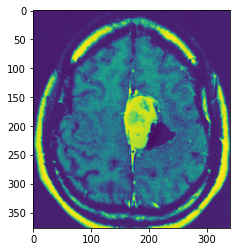

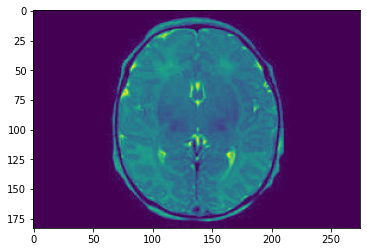

In [3]:
positives = [cv2.imread(x,0) for x in filepaths['yes']]
negatives = [cv2.imread(x,0) for x in filepaths['no']]

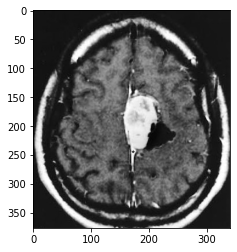

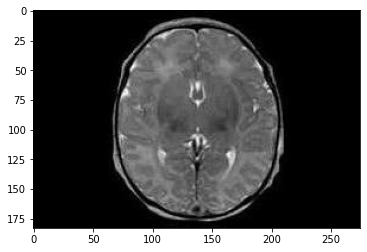

In [7]:
pyplot.imshow(positives[1], cmap='gray')
pyplot.show()
pyplot.imshow(negatives[1], cmap='gray')
pyplot.show()

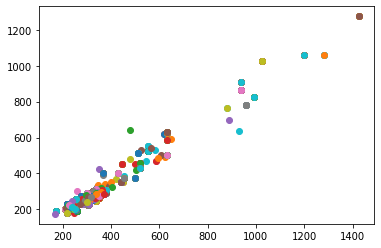

In [8]:


for p in positives:
    pyplot.scatter(p.shape[0],p.shape[1])

pyplot.show()

In [9]:
def process_image(image, size=(224,224)):
    
    image = cv2.GaussianBlur(image, (5,5), 0)
    thresh = cv2.threshold(image, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    c = max(contours, key = cv2.contourArea)
    
    p0 = np.min(c,axis=0)[0]
    p1 = np.max(c,axis=0)[0]
    
    return cv2.resize(image[p0[1]:p1[1], p0[0]:p1[0]], size, interpolation=cv2.INTER_CUBIC)

In [10]:
format_yes = [process_image(x) for x in positives]
format_no = [process_image(x) for x in negatives]

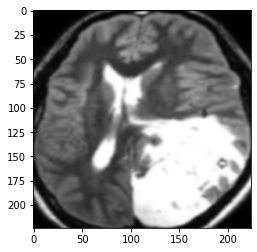

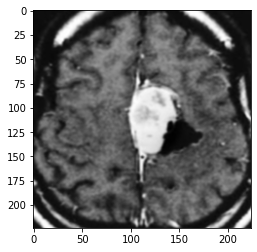

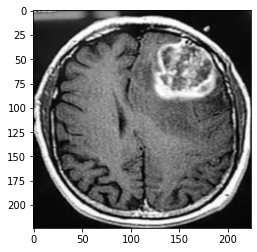

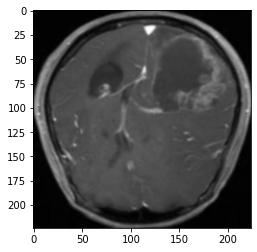

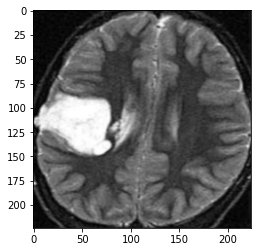

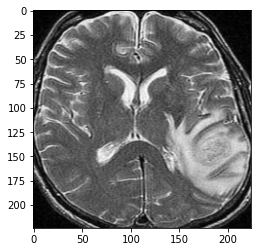

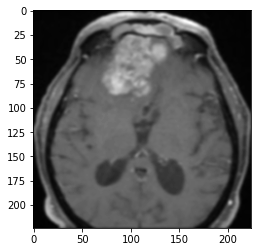

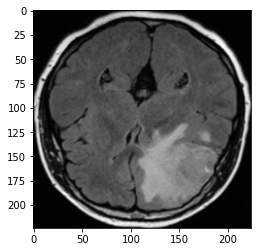

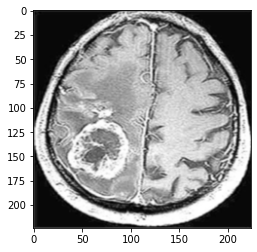

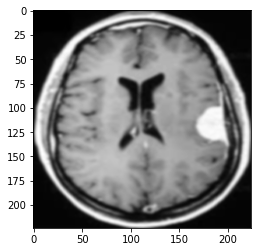

In [13]:
for p in format_yes[0:10]:
    pyplot.imshow(p, cmap='gray')
    pyplot.show()

In [15]:
os.mkdir(os.path.join('data', 'formatted_data'))
os.mkdir(os.path.join('data', 'formatted_data', 'no'))

In [16]:
os.mkdir(os.path.join('data', 'formatted_data', 'yes'))

In [17]:
len(format_no)

1500

In [18]:
output_path = os.path.join('data','formatted_data')

for i, image in enumerate(format_no):
    cv2.imwrite(os.path.join(output_path, 'no', str(i).zfill(5)+'_no.png'), image)
    
for i, image in enumerate(format_yes):
    cv2.imwrite(os.path.join(output_path, 'yes', str(i).zfill(5)+'_yes.png'), image)
